<a href="https://colab.research.google.com/github/ALL-Rodrigues/Topicos_Avancados/blob/main/Notebooks/Aula05_14_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quinta Aula de Tópicos Avançados

## - Cores


- Discretização: Quantização

- Histograma:

## Exercício 1: Melhorando a Visibilidade de uma Imagem Escura
**Objetivo:**

Melhorar a visibilidade de uma imagem escura, aplicando técnicas de
ajuste de brilho e contraste, equalização de histograma e nitidez. O aluno
deve combinar partes dos códigos fornecidos para criar uma única imagem
processada que seja clara e detalhada.

**Tarefas:**
1. Carregue uma imagem escura (forneça uma imagem de exemplo ou
peça para os alunos usarem uma própria).
2. Aplique ajuste de brilho e contraste para clarear a imagem.
3. Use a equalização de histograma para melhorar o contraste.
4. Aplique um filtro de nitidez para realçar os detalhes.
5. Exiba a imagem original e a imagem processada lado a lado.


## Código Base para Modificação:

Os alunos podem começar com o
código Imagem_Qualidade_Melhorada_.py e fazer ajustes para incluir a
exibição lado a lado da imagem original e processada.

**Solução Esperada:**

Os alunos devem modificar o código para exibir as imagens lado a lado
usando np.concatenate e garantir que todas as etapas de processamento
sejam aplicadas corretamente (ou pode apresentar as imagens uma
embaixo da outra).


Saving out.jpg to out (15).jpg
Arquivo carregado: out (15).jpg
Imagem Original:


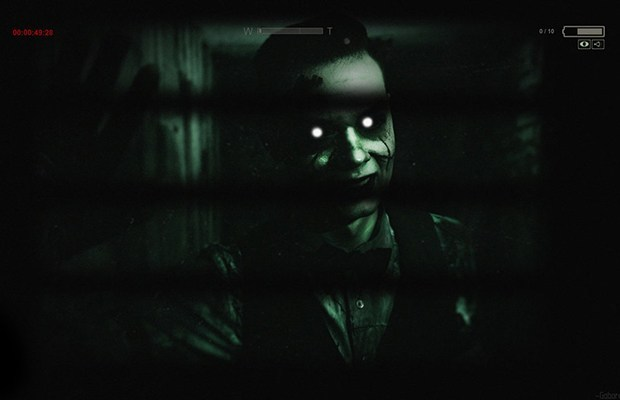

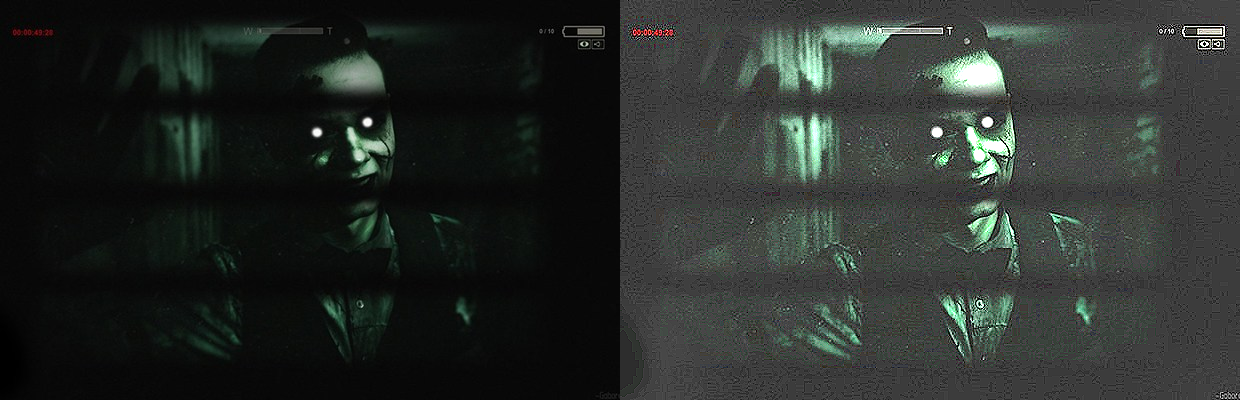

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Faz o upload da imagem
uploaded = files.upload()

# Verifica o nome do arquivo carregado
file_name = list(uploaded.keys())[0]
print(f"Arquivo carregado: {file_name}")

# Carregar a imagem
img = cv2.imread(file_name)

# Verifica se a imagem foi carregada corretamente
if img is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho ou o nome do arquivo.")
else:
    # 1. Aplicar equalização de histograma adaptativa (CLAHE)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # Converter para espaço de cores LAB
    l, a, b = cv2.split(lab)  # Separar os canais
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Criar objeto CLAHE
    l_clahe = clahe.apply(l)  # Aplicar CLAHE no canal L (luminância)
    lab_clahe = cv2.merge((l_clahe, a, b))  # Juntar os canais novamente
    img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)  # Converter de volta para BGR

    # 2. Ajustar brilho e contraste localmente
    # Usar uma máscara para focar no personagem (opcional)
    alpha = 1.3  # Fator de contraste
    beta = 40    # Fator de brilho
    adjusted = cv2.convertScaleAbs(img_clahe, alpha=alpha, beta=beta)

    # 3. Realçar as cores (aumentar saturação)
    hsv = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)  # Converter para HSV
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.5, 0, 255)  # Aumentar saturação
    final_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)  # Converter de volta para BGR

    # 4. Aplicar nitidez (filtro de nitidez)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Kernel de nitidez
    sharpened = cv2.filter2D(final_image, -1, kernel)

    # Exibir a imagem original e a imagem final processada
    print("Imagem Original:")
    cv2_imshow(img)

    #print("\nImagem Final Processada (Melhorada):")
    #cv2_imshow(sharpened)

    # Salvar a imagem resultante (opcional)
    #cv2.imwrite('final_image_improved.png', sharpened)
    #print("\nImagem final salva como 'final_image_improved.png'.")

    print('\n')

    print("\nImagem Final Processada (Melhorada):")
    r = np.concatenate((img, sharpened), axis=1)
    cv2_imshow(r)
    #cv2.imwrite('final_image_improved.png', sharpened)
    #np.concatenate((img, eq), axis=1)


# Exercício 2: Quantização de Cores com Melhoria de Qualidade

**Objetivo:**

Reduzir o número de cores de uma imagem usando quantização, mas
mantendo a qualidade visual da imagem. O aluno deve combinar a
quantização de cores com técnicas de melhoria de qualidade, como ajuste
de brilho e contraste e nitidez.

**Tarefas:**

1. Carregue uma imagem colorida.
2. Aplique a quantização de cores para reduzir o número de cores (por
exemplo, para 16 cores).
3. Melhore a qualidade da imagem quantizada aplicando ajuste de brilho
e contraste.
4. Aplique um filtro de nitidez para realçar os detalhes.
5. Exiba a imagem original, a imagem quantizada e a imagem quantizada
com melhorias lado a lado.

#Código Base para Modificação:
Os alunos podem começar com o código quantizacao_reduce_.py e
adicionar as etapas de melhoria de qualidade do
código Imagem_Qualidade_Melhorada_.py.

**Solução Esperada:**

Os alunos devem modificar o código para incluir as etapas de melhoria de
qualidade após a quantização e exibir as três imagens lado a lado, ou uma
embaixo da outra.

Saving lena_color_128_128_.jpg to lena_color_128_128_ (9).jpg
Imagem Original:


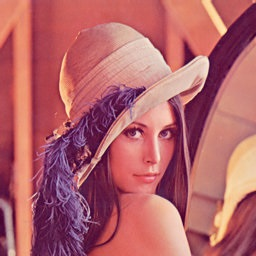


Imagem Quantizada (16 cores):


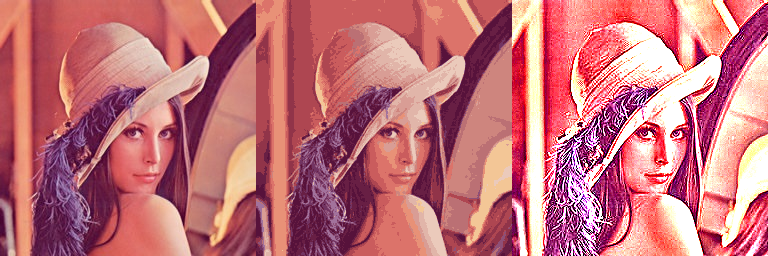

Imagem quantizada salva em: /content/imagem_quantizada.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download da imagem quantizada concluído!


In [ ]:


import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Fazer upload da imagem
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Pega o nome do arquivo carregado

# Carregar a imagem
image = cv2.imread(file_name)

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro: Não foi possível carregar a imagem.")
else:
    # Exibir a imagem original
    print("Imagem Original:")
    cv2_imshow(image)

    # Quantização de cores
    def quantize_image(img, k):
        # Redimensionar a imagem para um array 2D de pixels
        pixel_values = img.reshape((-1, 3))
        pixel_values = np.float32(pixel_values)

        # Critério de parada para o algoritmo K-Means
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

        # Aplicar K-Means para encontrar os clusters de cores
        _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Converter os centros dos clusters para valores de 8 bits
        centers = np.uint8(centers)

        # Mapear os pixels para os centros dos clusters
        quantized_image = centers[labels.flatten()]

        # Remodelar a imagem para o formato original
        quantized_image = quantized_image.reshape(img.shape)

        return quantized_image

    # 1. Aplicar equalização de histograma adaptativa (CLAHE)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # Converter para espaço de cores LAB
    l, a, b = cv2.split(lab)  # Separar os canais
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Criar objeto CLAHE
    l_clahe = clahe.apply(l)  # Aplicar CLAHE no canal L (luminância)
    lab_clahe = cv2.merge((l_clahe, a, b))  # Juntar os canais novamente
    img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)  # Converter de volta para BGR

    # 2. Ajustar brilho e contraste localmente
    # Usar uma máscara para focar no personagem (opcional)
    alpha = 1.3  # Fator de contraste
    beta = 40    # Fator de brilho
    adjusted = cv2.convertScaleAbs(img_clahe, alpha=alpha, beta=beta)

    # 3. Realçar as cores (aumentar saturação)
    hsv = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)  # Converter para HSV
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.5, 0, 255)  # Aumentar saturação
    final_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)  # Converter de volta para BGR

    # 4. Aplicar nitidez (filtro de nitidez)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Kernel de nitidez
    sharpened = cv2.filter2D(final_image, -1, kernel)

    # Definir o número de cores desejado (k)
    k = 16  # Reduzir a imagem para 8 cores
    quantized = quantize_image(image, k)

    print("\nImagem Quantizada (16 cores):")
    r = np.concatenate((image, quantized, sharpened), axis=1)
    cv2_imshow(r)

    # Salvar a imagem quantizada
    caminho_salvar = '/content/imagem_quantizada.jpg'
    cv2.imwrite(caminho_salvar, quantized)
    print(f"Imagem quantizada salva em: {caminho_salvar}")

    # Fazer o download da imagem quantizada
    try:
        files.download(caminho_salvar)
        print("Download da imagem quantizada concluído!")
    except Exception as e:
        print(f"Erro ao fazer o download: {e}")